In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("/Users/harshith/Downloads/Walmart_customer_purchases.csv")

In [2]:
df.head()

Customer_ID  Age  Gender           City  \
0  84607c1f-910c-44d5-b89f-e1ee06dd34c0   49  Female    New Cynthia   
1  f2a81712-a73e-4424-8b39-4c615a0bd4ea   36   Other       Cruzport   
2  da9be287-8b0e-4688-bccd-1a2cdd7567c6   52    Male    Jeffreytown   
3  50ec6932-3ac7-492f-9e55-4b148212f302   47  Female  Jenniferburgh   
4  8fdc3098-fc75-4b0f-983c-d8d8168c6362   43   Other      Kingshire   

      Category Product_Name Purchase_Date  Purchase_Amount    Payment_Method  \
0  Electronics   Smartphone    2024-08-30           253.26  Cash on Delivery   
1     Clothing      T-Shirt    2024-12-21            73.19        Debit Card   
2       Beauty      Perfume    2024-12-26           125.62       Credit Card   
3  Electronics   Smartwatch    2024-11-04           450.32       Credit Card   
4  Electronics   Smartphone    2024-10-07           369.28       Credit Card   

  Discount_Applied  Rating Repeat_Customer  
0               No       1             Yes  
1              Yes       1              No  
2              Yes       1              No  
3               No       2             Yes  
4              Yes       2             Yes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       50000 non-null  object 
 1   Age               50000 non-null  int64  
 2   Gender            50000 non-null  object 
 3   City              50000 non-null  object 
 4   Category          50000 non-null  object 
 5   Product_Name      50000 non-null  object 
 6   Purchase_Date     50000 non-null  object 
 7   Purchase_Amount   50000 non-null  float64
 8   Payment_Method    50000 non-null  object 
 9   Discount_Applied  50000 non-null  object 
 10  Rating            50000 non-null  int64  
 11  Repeat_Customer   50000 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 4.6+ MB


In [4]:
df.describe().T

count       mean         std    min     25%      50%  \
Age              50000.0   38.94522   12.398137  18.00   28.00   39.000   
Purchase_Amount  50000.0  255.53223  141.574416  10.01  133.05  255.045   
Rating           50000.0    2.99868    1.417956   1.00    2.00    3.000   

                      75%     max  
Age               50.0000   60.00  
Purchase_Amount  378.9125  499.99  
Rating             4.0000    5.00

In [5]:
df.shape

(50000, 12)

In [6]:
df.isnull().sum()

Customer_ID         0
Age                 0
Gender              0
City                0
Category            0
Product_Name        0
Purchase_Date       0
Purchase_Amount     0
Payment_Method      0
Discount_Applied    0
Rating              0
Repeat_Customer     0
dtype: int64

In [7]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])

In [8]:
# additional column for identifying how days customer took to make a new purchase
from datetime import datetime
today = pd.to_datetime(datetime.today())
df['Days_Since_Purchase'] = (today - df['Purchase_Date']).dt.days

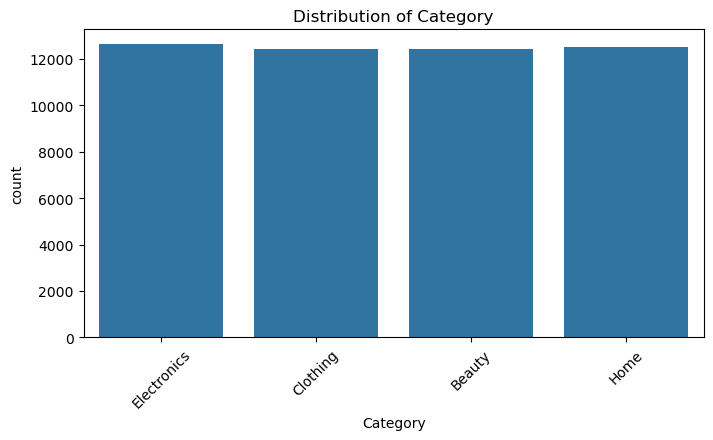

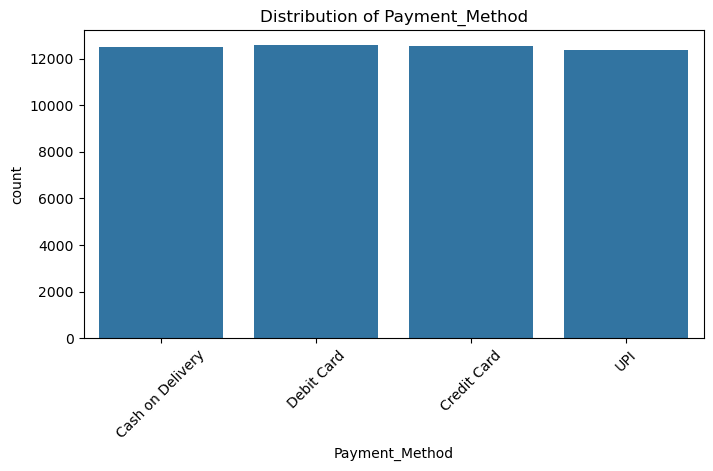

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
categorical_features = ['Gender', 'City', 'Category', 'Payment_Method', 'Repeat_Customer']

for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


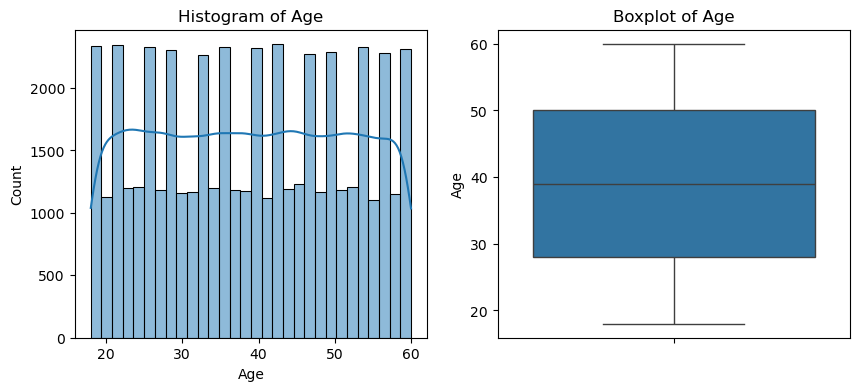

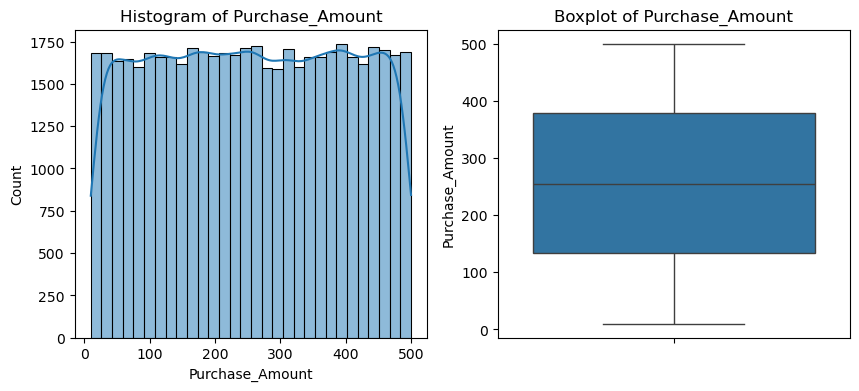

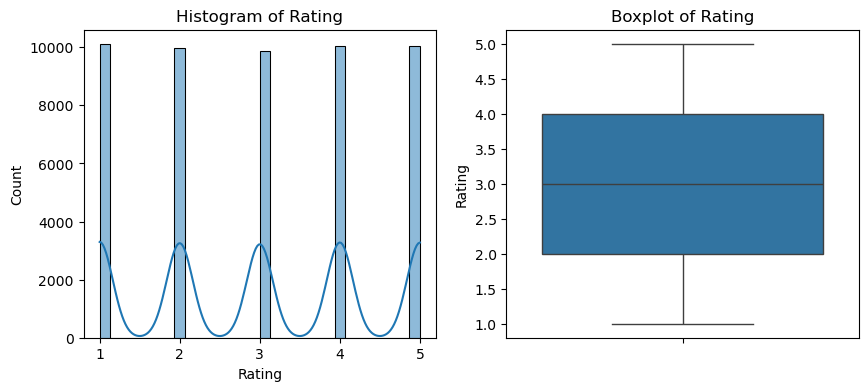

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_features = ['Age', 'Purchase_Amount', 'Rating']

for col in numerical_features:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.show()


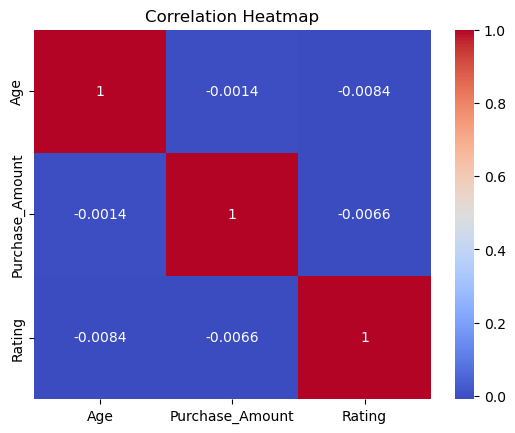

In [10]:
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [11]:
category_sales = df.groupby('Category')['Purchase_Amount'].sum().reset_index()
print(category_sales)


      Category  Purchase_Amount
0       Beauty       3174727.90
1     Clothing       3145977.98
2  Electronics       3260688.09
3         Home       3195217.51


In [12]:
avg_rating = df.groupby(['Category', 'Payment_Method'])['Rating'].mean().reset_index()
print(avg_rating)


       Category    Payment_Method    Rating
0        Beauty  Cash on Delivery  2.961589
1        Beauty       Credit Card  2.998099
2        Beauty        Debit Card  2.982676
3        Beauty               UPI  3.064700
4      Clothing  Cash on Delivery  2.974072
5      Clothing       Credit Card  2.991904
6      Clothing        Debit Card  2.995866
7      Clothing               UPI  2.975180
8   Electronics  Cash on Delivery  2.987139
9   Electronics       Credit Card  3.026007
10  Electronics        Debit Card  3.007004
11  Electronics               UPI  3.007595
12         Home  Cash on Delivery  2.978192
13         Home       Credit Card  3.046965
14         Home        Debit Card  2.982109
15         Home               UPI  2.997676


In [13]:
city_customers = df.groupby('City')['Customer_ID'].nunique().reset_index()
print(city_customers)


               City  Customer_ID
0         Aaronberg            1
1      Aaronborough            4
2        Aaronburgh            4
3         Aaronbury            3
4      Aaronchester            4
...             ...          ...
25091    Zunigabury            1
25092   Zunigahaven            1
25093    Zunigastad            1
25094     Zunigaton            1
25095    Zunigaview            1

[25096 rows x 2 columns]


In [14]:
print(df['Repeat_Customer'].value_counts())


Repeat_Customer
Yes    25244
No     24756
Name: count, dtype: int64


In [15]:
customer_summary = df.groupby('Customer_ID').agg(
    total_purchase=('Purchase_Amount', 'sum'),
    avg_purchase=('Purchase_Amount', 'mean'),
    purchase_count=('Purchase_Amount', 'count')
).reset_index()
print(customer_summary.head())


                            Customer_ID  total_purchase  avg_purchase  \
0  000181a8-a961-4865-922f-ec14ac3a6290           94.03         94.03   
1  00028cdf-0ea6-493f-9f96-df6d50cfa975           87.38         87.38   
2  0003f5b9-0a75-4108-94e2-e960aa99d2a3          394.37        394.37   
3  0008375d-c94d-45aa-9ce4-f2e21777cbd5          233.91        233.91   
4  0008c27f-5b3e-452e-8fb3-dd1744592d14          194.11        194.11   

   purchase_count  
0               1  
1               1  
2               1  
3               1  
4               1  


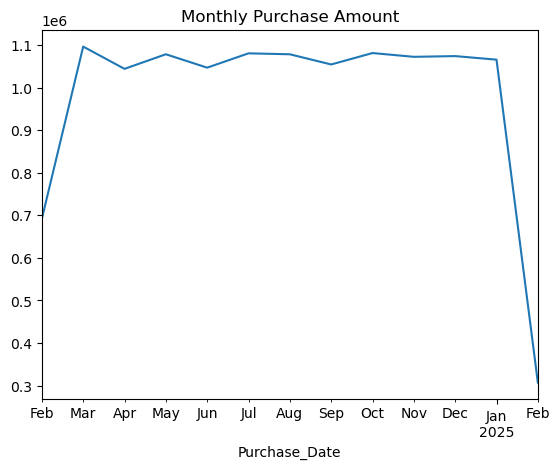

In [18]:
df['Purchase_Date'] = pd.to_datetime(df['Purchase_Date'])
df.set_index('Purchase_Date')['Purchase_Amount'].resample('M').sum().plot()
plt.title('Monthly Purchase Amount')
plt.show()
import warnings
warnings.filterwarnings("ignore")


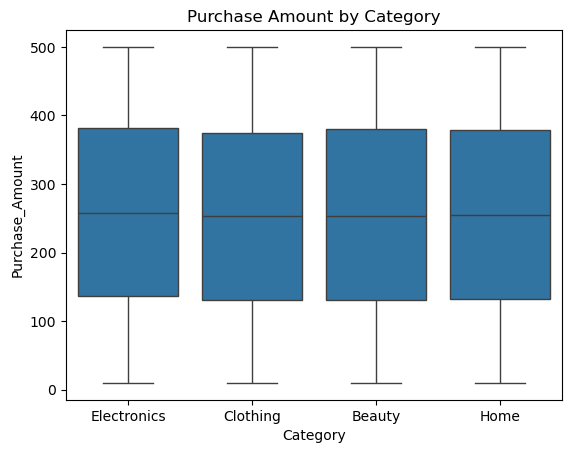

In [19]:
sns.boxplot(x='Category', y='Purchase_Amount', data=df)
plt.title('Purchase Amount by Category')
plt.show()


In [20]:
# Convert 'Repeat_Customer' to 1 and 0
df['Repeat_Customer'] = df['Repeat_Customer'].map({'Yes': 1, 'No': 0})


In [21]:
df.set_index('Customer_ID', inplace=True)


In [22]:
df.head()

Age  Gender           City     Category  \
Customer_ID                                                                     
84607c1f-910c-44d5-b89f-e1ee06dd34c0   49  Female    New Cynthia  Electronics   
f2a81712-a73e-4424-8b39-4c615a0bd4ea   36   Other       Cruzport     Clothing   
da9be287-8b0e-4688-bccd-1a2cdd7567c6   52    Male    Jeffreytown       Beauty   
50ec6932-3ac7-492f-9e55-4b148212f302   47  Female  Jenniferburgh  Electronics   
8fdc3098-fc75-4b0f-983c-d8d8168c6362   43   Other      Kingshire  Electronics   

                                     Product_Name Purchase_Date  \
Customer_ID                                                       
84607c1f-910c-44d5-b89f-e1ee06dd34c0   Smartphone    2024-08-30   
f2a81712-a73e-4424-8b39-4c615a0bd4ea      T-Shirt    2024-12-21   
da9be287-8b0e-4688-bccd-1a2cdd7567c6      Perfume    2024-12-26   
50ec6932-3ac7-492f-9e55-4b148212f302   Smartwatch    2024-11-04   
8fdc3098-fc75-4b0f-983c-d8d8168c6362   Smartphone    2024-10-07   

                                      Purchase_Amount    Payment_Method  \
Customer_ID                                                               
84607c1f-910c-44d5-b89f-e1ee06dd34c0           253.26  Cash on Delivery   
f2a81712-a73e-4424-8b39-4c615a0bd4ea            73.19        Debit Card   
da9be287-8b0e-4688-bccd-1a2cdd7567c6           125.62       Credit Card   
50ec6932-3ac7-492f-9e55-4b148212f302           450.32       Credit Card   
8fdc3098-fc75-4b0f-983c-d8d8168c6362           369.28       Credit Card   

                                     Discount_Applied  Rating  \
Customer_ID                                                     
84607c1f-910c-44d5-b89f-e1ee06dd34c0               No       1   
f2a81712-a73e-4424-8b39-4c615a0bd4ea              Yes       1   
da9be287-8b0e-4688-bccd-1a2cdd7567c6              Yes       1   
50ec6932-3ac7-492f-9e55-4b148212f302               No       2   
8fdc3098-fc75-4b0f-983c-d8d8168c6362              Yes       2   

                                      Repeat_Customer  Days_Since_Purchase  
Customer_ID                                                                 
84607c1f-910c-44d5-b89f-e1ee06dd34c0                1                  277  
f2a81712-a73e-4424-8b39-4c615a0bd4ea                0                  164  
da9be287-8b0e-4688-bccd-1a2cdd7567c6                0                  159  
50ec6932-3ac7-492f-9e55-4b148212f302                1                  211  
8fdc3098-fc75-4b0f-983c-d8d8168c6362                1                  239

No Strong Correlation Between Numerical Features
The correlation heatmap reveals very low correlation between features like Age, Rating, and Purchase_Amount, indicating that linear relationships are weak, which may explain why linear regression struggled in performance.

Repeat Customers Are Nearly Evenly Split
The dataset shows 25,244 repeat customers vs. 24,756 non-repeat, suggesting no heavy imbalance, making it a good candidate for supervised learning classification tasks (e.g., churn prediction).

City and Product_Name Have High Cardinality
Visuals show that City has over 25,000 unique values—a strong signal for target encoding or dimensionality reduction instead of one-hot encoding to avoid the curse of dimensionality.

Consistent Purchase Amount Across Categories
The boxplot of Purchase_Amount by Category shows similar median spending across product categories (Beauty, Clothing, Electronics, Home), suggesting no category strongly dominates spending in terms of per-customer purchase behavior.

Monthly Purchase Amount Spikes Consistently Except February
The time series line plot of Monthly Purchase Amount shows stable high purchase volume from March to January, with a noticeable drop in February, which could be due to fewer shopping days or seasonal behavior worth investigating further.

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
import optuna
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
import pandas as pd


X = df.drop(columns=['Repeat_Customer'])
y = df['Repeat_Customer']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Columns
all_numerical_cols = ['Age', 'Purchase_Amount', 'Rating']
all_categorical_cols = ['Gender', 'City', 'Category', 'Payment_Method', 'Product_Name', 'Discount_Applied']

def objective(trial):
    # Feature selection
    numerical_cols = [col for col in all_numerical_cols if trial.suggest_categorical(f"use_{col}", [True, False])]
    categorical_cols = [col for col in all_categorical_cols if trial.suggest_categorical(f"use_{col}", [True, False])]
    
    if not numerical_cols and not categorical_cols:
        return 0.0
    
    # Preprocessor
    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ])
    
    # Hyperparameters
    C = trial.suggest_float("C", 0.01, 10.0, log=True)
    penalty = trial.suggest_categorical("penalty", ["l1", "l2"])
    solver = 'liblinear' if penalty == 'l1' else 'lbfgs'
    
    # Pipeline
    clf_model = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(penalty=penalty, solver=solver, C=C, max_iter=1000,class_weight='balanced'))
    ])
    
    # Cross-validation on training data only
    cv_scores = cross_val_score(clf_model, X_train, y_train, cv=5, scoring='accuracy')
    return cv_scores.mean()

# Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Best params
print("Best parameters:", study.best_params)
print("Best CV Accuracy:", study.best_value)



[I 2025-06-03 17:04:41,907] A new study created in memory with name: no-name-417751ed-a34c-434b-9aa1-bf8152d21f3e
[I 2025-06-03 17:04:42,474] Trial 0 finished with value: 0.5035499999999999 and parameters: {'use_Age': False, 'use_Purchase_Amount': False, 'use_Rating': True, 'use_Gender': True, 'use_City': True, 'use_Category': True, 'use_Payment_Method': True, 'use_Product_Name': True, 'use_Discount_Applied': False, 'C': 0.5646095989411394, 'penalty': 'l1'}. Best is trial 0 with value: 0.5035499999999999.
[I 2025-06-03 17:04:43,021] Trial 1 finished with value: 0.4998 and parameters: {'use_Age': False, 'use_Purchase_Amount': False, 'use_Rating': True, 'use_Gender': True, 'use_City': True, 'use_Category': False, 'use_Payment_Method': False, 'use_Product_Name': True, 'use_Discount_Applied': True, 'C': 0.47130951026391393, 'penalty': 'l1'}. Best is trial 0 with value: 0.5035499999999999.
[I 2025-06-03 17:04:43,295] Trial 2 finished with value: 0.499475 and parameters: {'use_Age': False, '

Best parameters: {'use_Age': True, 'use_Purchase_Amount': False, 'use_Rating': False, 'use_Gender': True, 'use_City': True, 'use_Category': True, 'use_Payment_Method': False, 'use_Product_Name': False, 'use_Discount_Applied': False, 'C': 0.17249619605027844, 'penalty': 'l2'}
Best CV Accuracy: 0.506025


In [24]:
# Final model with best params
best_numerical_cols = [col for col in all_numerical_cols if study.best_params.get(f"use_{col}", False)]
best_categorical_cols = [col for col in all_categorical_cols if study.best_params.get(f"use_{col}", False)]
best_C = study.best_params['C']
best_penalty = study.best_params['penalty']
solver = 'liblinear' if best_penalty == 'l1' else 'lbfgs'

final_preprocessor = ColumnTransformer([
    ('num', StandardScaler(), best_numerical_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), best_categorical_cols)
])

final_model = Pipeline([
    ('preprocessor', final_preprocessor),
    ('classifier', LogisticRegression(penalty=best_penalty, solver=solver, C=best_C, max_iter=1000,class_weight='balanced'))
])

# Train on full training set
final_model.fit(X_train, y_train)

# Evaluate on test set
from sklearn.metrics import accuracy_score, classification_report
y_pred = final_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Test Accuracy: 0.5004
              precision    recall  f1-score   support

           0       0.50      0.50      0.50      4951
           1       0.51      0.50      0.50      5049

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



In [25]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import optuna
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
optuna.logging.set_verbosity(optuna.logging.WARNING)

def objective(trial):
    # Feature selection
    numerical_cols = [col for col in all_numerical_cols if trial.suggest_categorical(f"use_{col}", [True, False])]
    categorical_cols = [col for col in all_categorical_cols if trial.suggest_categorical(f"use_{col}", [True, False])]

    total_features = len(numerical_cols) + len(categorical_cols)
    if total_features == 0:
        return 0.0  
    
    
    k = trial.suggest_int('k', 1, total_features)
    
    
    preprocessor = ColumnTransformer([
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ])

    # Random Forest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)
    
    # Pipeline
    clf_model = Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(f_classif, k=k)),
        ('classifier', RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42,
            n_jobs=-1
        ))
    ])

    # Cross-validation
    cv_scores = cross_val_score(clf_model, X_train, y_train, cv=5, scoring='accuracy')
    return cv_scores.mean()

# Optuna Study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# Results
print("Best parameters:", study.best_params)
print("Best CV Accuracy:", study.best_value)

Best parameters: {'use_Age': False, 'use_Purchase_Amount': True, 'use_Rating': True, 'use_Gender': False, 'use_City': True, 'use_Category': False, 'use_Payment_Method': False, 'use_Product_Name': True, 'use_Discount_Applied': True, 'k': 3, 'n_estimators': 763, 'max_depth': 16, 'min_samples_split': 7, 'min_samples_leaf': 2}
Best CV Accuracy: 0.505


In [26]:
best_numerical_cols = [col for col in all_numerical_cols if study.best_params.get(f"use_{col}", False)]
best_categorical_cols = [col for col in all_categorical_cols if study.best_params.get(f"use_{col}", False)]
k = study.best_params['k']

final_preprocessor = ColumnTransformer([
    ('num', 'passthrough', best_numerical_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), best_categorical_cols)
])

final_model = Pipeline([
    ('preprocessor', final_preprocessor),
    ('feature_selection', SelectKBest(f_classif, k=k)),
    ('classifier', RandomForestClassifier(
        n_estimators=study.best_params['n_estimators'],
        max_depth=study.best_params['max_depth'],
        min_samples_split=study.best_params['min_samples_split'],
        min_samples_leaf=study.best_params['min_samples_leaf'],
        random_state=42,
        n_jobs=-1
    ))
])

# Train and evaluate
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test Accuracy: 0.505
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      4951
           1       0.50      1.00      0.67      5049

    accuracy                           0.51     10000
   macro avg       0.75      0.50      0.34     10000
weighted avg       0.75      0.51      0.34     10000



In [27]:
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from xgboost import XGBClassifier

# Load data
X = df.drop(columns=['Repeat_Customer'])
y = df['Repeat_Customer']

# Feature Engineering
X['Days_Since_Purchase_Bin'] = pd.cut(X['Days_Since_Purchase'], bins=[0, 30, 90, 180, 365, 10000], labels=[1, 2, 3, 4, 5])
X['Age_Purchase_Amount'] = X['Age'] * X['Purchase_Amount']

# Target Encoding for Product_Name and City
for col in ['Product_Name', 'City']:
    means = df.groupby(col)['Repeat_Customer'].mean()
    X[col + '_TE'] = X[col].map(means).fillna(0.5)  # Default to 0.5 if unseen in training

X['Total_Spend'] = X['Purchase_Amount']  

# Drop original high-cardinality columns
X = X.drop(columns=['Product_Name', 'City'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Define columns
all_numerical_cols = ['Age', 'Purchase_Amount', 'Rating', 'Days_Since_Purchase',
                      'Days_Since_Purchase_Bin', 'Age_Purchase_Amount', 'Product_Name_TE', 'City_TE', 'Total_Spend']
all_categorical_cols = ['Gender', 'Category', 'Payment_Method', 'Discount_Applied']
optuna.logging.set_verbosity(optuna.logging.WARNING)
def objective(trial):
    # Feature selection
    numerical_cols = [col for col in all_numerical_cols if trial.suggest_categorical(f"use_{col}", [True, False])]
    categorical_cols = [col for col in all_categorical_cols if trial.suggest_categorical(f"use_{col}", [True, False])]

    total_features = len(numerical_cols) + len(categorical_cols)
    if total_features == 0:
        return 0.0

    k = trial.suggest_int('k', 1, total_features)
    
    preprocessor = ColumnTransformer([
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ])
    
    scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
    
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    gamma = trial.suggest_float('gamma', 0, 5)
    
    clf_model = Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(f_classif, k=k)),
        ('classifier', XGBClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            gamma=gamma,
            scale_pos_weight=scale_pos_weight,
            eval_metric='logloss',
            random_state=42,
            n_jobs=-1
        ))
    ])

    cv_scores = cross_val_score(clf_model, X_train, y_train, cv=5, scoring='accuracy')
    return cv_scores.mean()

# Optuna tuning
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best parameters:", study.best_params)
print("Best CV Accuracy:", study.best_value)



Best parameters: {'use_Age': False, 'use_Purchase_Amount': True, 'use_Rating': False, 'use_Days_Since_Purchase': False, 'use_Days_Since_Purchase_Bin': False, 'use_Age_Purchase_Amount': True, 'use_Product_Name_TE': False, 'use_City_TE': True, 'use_Total_Spend': True, 'use_Gender': False, 'use_Category': False, 'use_Payment_Method': True, 'use_Discount_Applied': False, 'k': 2, 'n_estimators': 240, 'max_depth': 12, 'learning_rate': 0.15531839178299825, 'subsample': 0.850742853241013, 'colsample_bytree': 0.9582878677302259, 'gamma': 2.2772793491888548}
Best CV Accuracy: 0.7905


In [28]:
best_numerical_cols = [col for col in all_numerical_cols if study.best_params.get(f"use_{col}", False)]
best_categorical_cols = [col for col in all_categorical_cols if study.best_params.get(f"use_{col}", False)]
k = study.best_params['k']
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
final_preprocessor = ColumnTransformer([
    ('num', 'passthrough', best_numerical_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), best_categorical_cols)
])

final_model = Pipeline([
    ('preprocessor', final_preprocessor),
    ('feature_selection', SelectKBest(f_classif, k=k)),
    ('classifier', XGBClassifier(
        n_estimators=study.best_params['n_estimators'],
        max_depth=study.best_params['max_depth'],
        learning_rate=study.best_params['learning_rate'],
        subsample=study.best_params['subsample'],
        colsample_bytree=study.best_params['colsample_bytree'],
        gamma=study.best_params['gamma'],
        scale_pos_weight=scale_pos_weight,
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    ))
])

# Train and evaluate
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Test Accuracy: 0.7847
              precision    recall  f1-score   support

           0       0.75      0.86      0.80      4951
           1       0.84      0.71      0.77      5049

    accuracy                           0.78     10000
   macro avg       0.79      0.79      0.78     10000
weighted avg       0.79      0.78      0.78     10000



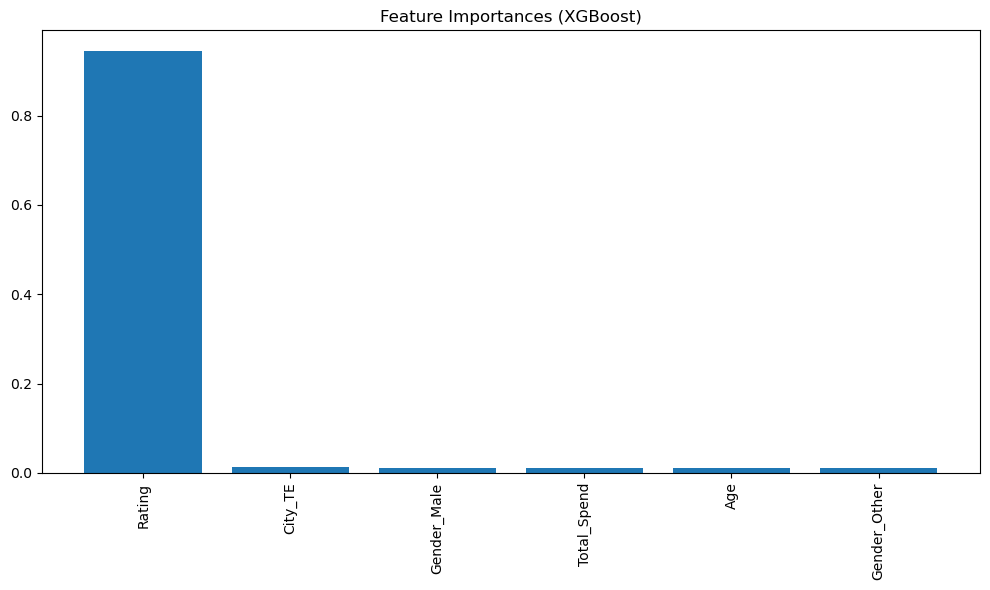

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Access the trained XGBoost model
xgb_model = final_model.named_steps['classifier']
feature_names = final_model.named_steps['preprocessor'].transformers_[0][2] + \
                list(final_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())

# Get feature importances
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (XGBoost)")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


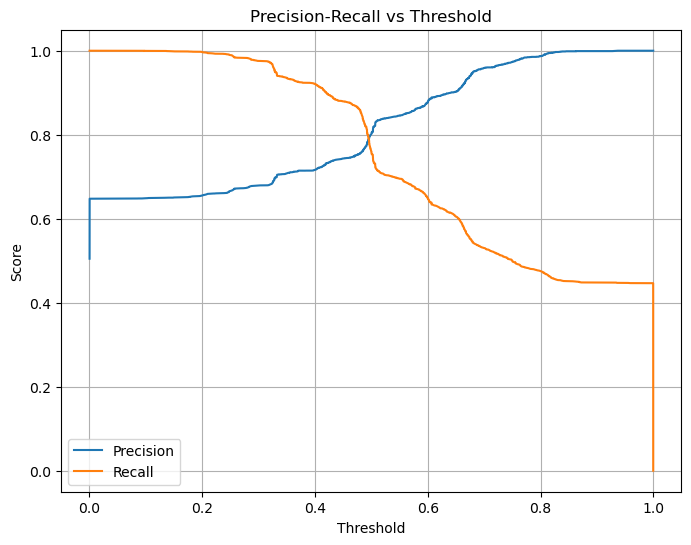

Adjusted Threshold Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.63      0.74      4951
           1       0.72      0.92      0.81      5049

    accuracy                           0.78     10000
   macro avg       0.80      0.77      0.77     10000
weighted avg       0.80      0.78      0.77     10000



In [34]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities
y_probs = final_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot Precision-Recall vs Threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid()
plt.show()

# Set a new threshold (e.g., 0.4)
new_threshold = 0.4
y_pred_adjusted = (y_probs >= new_threshold).astype(int)
print("Adjusted Threshold Classification Report:")
print(classification_report(y_test, y_pred_adjusted))


In [ ]:
from lightgbm import LGBMClassifier

def objective_lgb(trial):
    numerical_cols = [col for col in all_numerical_cols if trial.suggest_categorical(f"use_{col}", [True, False])]
    categorical_cols = [col for col in all_categorical_cols if trial.suggest_categorical(f"use_{col}", [True, False])]
    total_features = len(numerical_cols) + len(categorical_cols)
    if total_features == 0:
        return 0.0

    k = trial.suggest_int('k', 1, total_features)
    preprocessor = ColumnTransformer([
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ])
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    num_leaves = trial.suggest_int('num_leaves', 20, 100)

    clf_model = Pipeline([
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(f_classif, k=k)),
        ('classifier', LGBMClassifier(
            n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate,
            subsample=subsample, num_leaves=num_leaves, random_state=42, n_jobs=-1
        ))
    ])

    cv_scores = cross_val_score(clf_model, X_train, y_train, cv=5, scoring='accuracy')
    return cv_scores.mean()

study_lgb = optuna.create_study(direction="maximize")
study_lgb.optimize(objective_lgb, n_trials=50)
print("Best parameters:", study.best_params)
print("Best CV Accuracy:", study.best_value)

[LightGBM] [Info] Number of positive: 16156, number of negative: 15844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 513
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504875 -> initscore=0.019501
[LightGBM] [Info] Start training from score 0.019501
[LightGBM] [Info] Number of positive: 16156, number of negative: 15844
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 527
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 3
[LightGBM] [Info] [binar

In [36]:
print("Best parameters:", study.best_params)
print("Best CV Accuracy:", study.best_value)

Best parameters: {'use_Age': True, 'use_Purchase_Amount': False, 'use_Rating': True, 'use_Days_Since_Purchase': False, 'use_Days_Since_Purchase_Bin': False, 'use_Age_Purchase_Amount': False, 'use_Product_Name_TE': False, 'use_City_TE': True, 'use_Total_Spend': True, 'use_Gender': True, 'use_Category': True, 'use_Payment_Method': True, 'use_Discount_Applied': False, 'k': 6, 'n_estimators': 828, 'max_depth': 15, 'learning_rate': 0.1190886270785935, 'subsample': 0.8495669517281771, 'colsample_bytree': 0.8122819900346575, 'gamma': 3.464300460797574}
Best CV Accuracy: 0.7912999999999999


In [37]:
best_numerical_cols = [col for col in all_numerical_cols if study_lgb.best_params.get(f"use_{col}", False)]
best_categorical_cols = [col for col in all_categorical_cols if study_lgb.best_params.get(f"use_{col}", False)]
k = study_lgb.best_params['k']

# Best LightGBM hyperparameters
n_estimators = study_lgb.best_params['n_estimators']
max_depth = study_lgb.best_params['max_depth']
learning_rate = study_lgb.best_params['learning_rate']
subsample = study_lgb.best_params['subsample']
num_leaves = study_lgb.best_params['num_leaves']

# Define preprocessor
final_preprocessor = ColumnTransformer([
    ('num', 'passthrough', best_numerical_cols),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), best_categorical_cols)
])

# Build final LightGBM model
final_model_lgb = Pipeline([
    ('preprocessor', final_preprocessor),
    ('feature_selection', SelectKBest(f_classif, k=k)),
    ('classifier', LGBMClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        num_leaves=num_leaves,
        random_state=42,
        n_jobs=-1
    ))
])

# Train final model
final_model_lgb.fit(X_train, y_train)

# Evaluate on test set
from sklearn.metrics import accuracy_score, classification_report
y_pred_lgb = final_model_lgb.predict(X_test)
print("Test Accuracy (LightGBM):", accuracy_score(y_test, y_pred_lgb))
print("Classification Report (LightGBM):")
print(classification_report(y_test, y_pred_lgb))

[LightGBM] [Info] Number of positive: 20195, number of negative: 19805
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 114
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504875 -> initscore=0.019501
[LightGBM] [Info] Start training from score 0.019501
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
# Preprocessing
numerical_cols = ['Age', 'Purchase_Amount', 'Rating', 'Days_Since_Purchase', 'Days_Since_Purchase_Bin',
                  'Age_Purchase_Amount', 'Product_Name_TE', 'City_TE', 'Total_Spend']
categorical_cols = ['Gender', 'Category', 'Payment_Method', 'Discount_Applied']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Build Neural Network
input_dim = X_train_processed.shape[1]
model = Sequential([
    Dense(128, activation='relu', input_dim=input_dim),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_processed, y_train, validation_split=0.2, epochs=20, batch_size=32)

# Evaluate
y_pred_probs = model.predict(X_test_processed).flatten()
y_pred = (y_pred_probs >= 0.5).astype(int)
print("Test Accuracy (Neural Network):", accuracy_score(y_test, y_pred))
print("Classification Report (NN):")
print(classification_report(y_test, y_pred))


Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 504us/step - accuracy: 0.7707 - loss: 0.4351 - val_accuracy: 0.7926 - val_loss: 0.3621
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.7875 - loss: 0.3704 - val_accuracy: 0.7912 - val_loss: 0.3570
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.7872 - loss: 0.3618 - val_accuracy: 0.7889 - val_loss: 0.3564
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.7880 - loss: 0.3598 - val_accuracy: 0.7904 - val_loss: 0.3566
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.7918 - loss: 0.3585 - val_accuracy: 0.7894 - val_loss: 0.3554
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 447us/step - accuracy: 0.7891 - loss: 0.3589 - val_accuracy: 0.7905 - val_loss: 0.3553
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.7907 - loss: 0.3572 - val_accuracy: 0.7872 - val_loss: 0.3547
Epoch 8/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.7925 -

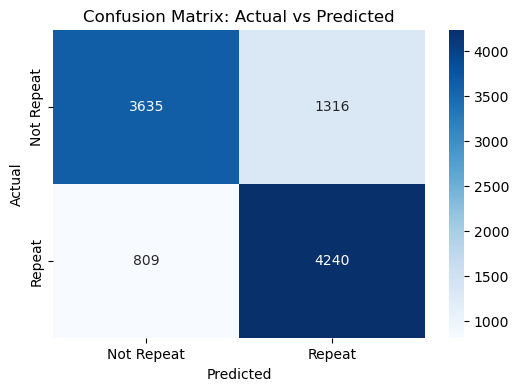

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot a confusion matrix heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Repeat', 'Repeat'], yticklabels=['Not Repeat', 'Repeat'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Actual vs Predicted')
plt.show()



Accuracy = (TP + TN) / Total = (3635 + 4240) / 10000 = 78.75%

Precision (Repeat) = TP / (TP + FP)
= 4240 / (4240 + 1316) = 76.3% Of the customers predicted as "Repeat", 76.3% were actually repeat.

Recall (Repeat) = TP / (TP + FN)
= 4240 / (4240 + 809) = 84% Of all actual repeat customers, the model correctly identified 84%.



In [ ]:
predict store sales of product category , forecast for 1 year in months for each mobile in 10000 stores